In [21]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,make_scorer,log_loss

In [7]:
sepsis = pd.read_csv('Sepsis_Compiled_Full.csv',index_col=0)

/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [14]:
X = sepsis.iloc[:,2:-6]
y = sepsis['SepsisLabel']

In [15]:
X.shape,y.shape

((1552210, 36), (1552210,))

In [46]:
features = list(X.columns)
features

['HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'EtCO2',
 'BaseExcess',
 'HCO3',
 'FiO2',
 'pH',
 'PaCO2',
 'SaO2',
 'AST',
 'BUN',
 'Alkalinephos',
 'Calcium',
 'Chloride',
 'Creatinine',
 'Bilirubin_direct',
 'Glucose',
 'Lactate',
 'Magnesium',
 'Phosphate',
 'Potassium',
 'Bilirubin_total',
 'TroponinI',
 'Hct',
 'Hgb',
 'PTT',
 'WBC',
 'Fibrinogen',
 'Platelets',
 'Age',
 'Gender']

In [17]:
xgb_model = xgb.XGBClassifier()

In [32]:
parameters = {'objective':['binary:logistic'],
              'max_depth': [7,8,9],
              'n_estimators': [50,100,500]}
scoring = {'f1': make_scorer(f1_score), 
           'Accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
          'recall':make_scorer(recall_score),
          'auc':make_scorer(roc_auc_score)}

kfold = StratifiedKFold(n_splits=3, shuffle=True)

In [33]:
clf = GridSearchCV(xgb_model, parameters, n_jobs=-1, 
                   cv=kfold, 
                   scoring=scoring,
                   verbose=3, refit='auc')
clf.fit(X,y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  27 | elapsed: 21.9min remaining: 20.3min
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed: 66.6min remaining:  8.3min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 76.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:l...
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [7, 8, 9], 'n_estimators': [50, 100, 500],
                         'objective': ['binary:logistic']},
             pre_dispatch='2*n_jobs', refit='auc', return_train_score=False,
             scoring={'Accuracy': make_scorer(accuracy_score),
                      'auc': make_scorer(roc_auc_score),


https://www.kaggle.com/phunter/xgboost-with-gridsearchcv
https://stackoverflow.com/questions/50537651/multiple-scoring-metrics-with-sklearn-xgboost-gridsearchcv
https://stackoverflow.com/questions/50824326/xgboost-with-gridsearchcv-scaling-pca-and-early-stopping-in-sklearn-pipeline


In [41]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_objective,params,split0_test_f1,split1_test_f1,...,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_auc,split1_test_auc,split2_test_auc,mean_test_auc,std_test_auc,rank_test_auc
0,426.950657,3.961801,6.085655,0.175210,7,50,binary:logistic,"{'max_depth': 7, 'n_estimators': 50, 'objectiv...",0.001717,0.003218,...,0.000430,0.000967,0.000489,9,0.500426,0.500802,0.500215,0.500481,0.000243,9
1,785.634939,1.933656,9.288297,0.109879,7,100,binary:logistic,"{'max_depth': 7, 'n_estimators': 100, 'objecti...",0.003856,0.006207,...,0.002364,0.002472,0.000489,7,0.500955,0.501547,0.501172,0.501225,0.000245,7
2,3342.601518,6.103948,32.000474,0.357733,7,500,binary:logistic,"{'max_depth': 7, 'n_estimators': 500, 'objecti...",0.011929,0.012560,...,0.006556,0.006305,0.000221,3,0.502982,0.503140,0.503253,0.503125,0.000111,3
3,495.967852,0.496662,6.371085,0.080822,8,50,binary:logistic,"{'max_depth': 8, 'n_estimators': 50, 'objectiv...",0.002788,0.005141,...,0.001505,0.001827,0.000534,8,0.500691,0.501283,0.500745,0.500906,0.000267,8
4,851.772102,1.854979,11.287716,0.180522,8,100,binary:logistic,"{'max_depth': 8, 'n_estimators': 100, 'objecti...",0.005778,0.008332,...,0.003439,0.003511,0.000529,5,0.501439,0.502078,0.501703,0.501740,0.000262,5
5,3453.294233,3.844726,31.122108,0.261059,8,500,binary:logistic,"{'max_depth': 8, 'n_estimators': 500, 'objecti...",0.017611,0.019302,...,0.009242,0.009314,0.000355,2,0.504423,0.504857,0.504575,0.504618,0.000180,2
6,508.480864,0.958508,7.122403,0.162699,9,50,binary:logistic,"{'max_depth': 9, 'n_estimators': 50, 'objectiv...",0.004285,0.007270,...,0.002042,0.002615,0.000736,6,0.501066,0.501813,0.501009,0.501296,0.000366,6
7,1078.694777,1.396902,12.972846,0.480974,9,100,binary:logistic,"{'max_depth': 9, 'n_estimators': 100, 'objecti...",0.008121,0.010451,...,0.003654,0.004334,0.000682,4,0.502027,0.502610,0.501808,0.502149,0.000339,4
8,3247.888251,5.221683,27.309642,0.881786,9,500,binary:logistic,"{'max_depth': 9, 'n_estimators': 500, 'objecti...",0.020095,0.023460,...,0.009457,0.010532,0.001035,1,0.505051,0.505918,0.504688,0.505219,0.000516,1


In [43]:
clf.best_estimator_.feature_importances_

array([0.03916492, 0.0304348 , 0.03602669, 0.03174215, 0.03011269,
       0.03206563, 0.03811723, 0.06212297, 0.03285283, 0.02050641,
       0.06462009, 0.02242299, 0.01935264, 0.02114456, 0.02081406,
       0.02493239, 0.01971128, 0.01903642, 0.02102066, 0.02033727,
       0.02219412, 0.02275156, 0.02760221, 0.01951717, 0.01886974,
       0.02018483, 0.02291619, 0.02268499, 0.02006757, 0.01808425,
       0.02029211, 0.02115607, 0.02119908, 0.02119196, 0.05094668,
       0.04380279], dtype=float32)

In [47]:
featur_importances = pd.DataFrame()
featur_importances['feats'] = features
featur_importances['scroe'] = clf.best_estimator_.feature_importances_

In [50]:
featur_importances.sort_values('scroe',ascending=False)

,feats,scroe
10,FiO2,0.064620
7,EtCO2,0.062123
34,Age,0.050947
35,Gender,0.043803
0,HR,0.039165
6,Resp,0.038117
2,Temp,0.036027
8,BaseExcess,0.032853
5,DBP,0.032066
3,SBP,0.031742


In [ ]:
# save model to file
pickle.dump(model, open("pima.pickle.dat", "wb"))
2
# load model from file
loaded_model = pickle.load(open("pima.pickle.dat", "rb"))

In [56]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
pickle.dump(clf.best_estimator_, open("xgboost_v1.pima.pickle.dat","wb"))

<Figure size 864x864 with 0 Axes>

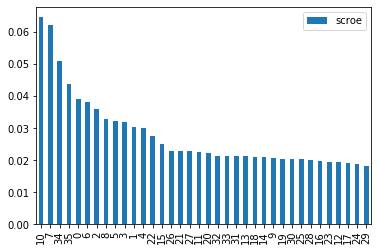

In [62]:
plt.figure(figsize=(12,12))
featur_importances.sort_values('scroe',ascending=False).plot.bar()
plt.show()